In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

## Loading in Data

In [2]:
all_scores = pd.read_csv("assists1 - Sheet1.csv")

In [3]:
all_scores.head()

,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ
0,Tyrese Haliburton,IND,37,20,17,33.5,73.9,78.3,10.2,1.1,19.9,27.2,12.5,13.8,16.9
1,James Harden,PHI,22,14,8,38.3,70.0,81.4,10.8,1.1,17.8,28.5,13.6,15.5,19.4
2,Chris Paul,PHX,25,11,14,31.8,59.9,63.4,8.6,0.9,17.5,22.5,10.6,14.4,17.7
3,Trae Young,ATL,34,16,18,35.7,48.4,71.1,9.9,0.6,17.1,24.2,11.4,20.4,23.4
4,Luka Doncic,DAL,36,22,14,36.9,55.9,69.2,8.7,1.2,16.4,23.4,10.6,15.6,19.0


In [4]:
all_scores.columns

Index(['PLAYER', 'TEAM', 'GP', 'W', 'L', 'MIN', 'PASSES MADE',
       'PASSES RECEIVED', 'AST', 'SECONDARY AST', 'POTENTIAL AST',
       'AST PTS CREATED', 'AST ADJ', 'AST TO PASS%', 'AST TO PASS% ADJ'],
      dtype='object')

In [5]:
#potential assists per assist
all_scores['pa_per_assist'] = all_scores['POTENTIAL AST']/all_scores['AST']

In [6]:
all_scores

,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ,pa_per_assist
0,Tyrese Haliburton,IND,37,20,17,33.5,73.9,78.3,10.2,1.1,19.9,27.2,12.5,13.8,16.9,1.950980
1,James Harden,PHI,22,14,8,38.3,70.0,81.4,10.8,1.1,17.8,28.5,13.6,15.5,19.4,1.648148
2,Chris Paul,PHX,25,11,14,31.8,59.9,63.4,8.6,0.9,17.5,22.5,10.6,14.4,17.7,2.034884
3,Trae Young,ATL,34,16,18,35.7,48.4,71.1,9.9,0.6,17.1,24.2,11.4,20.4,23.4,1.727273
4,Luka Doncic,DAL,36,22,14,36.9,55.9,69.2,8.7,1.2,16.4,23.4,10.6,15.6,19.0,1.885057
5,Nikola Jokic,DEN,35,24,11,33.4,74.4,66.2,9.5,0.9,15.9,23.9,11.4,12.8,15.4,1.673684
6,Mike Conley,UTA,30,16,14,29.4,56.7,58.5,7.6,0.6,14.5,20.7,9.2,13.4,16.2,1.907895
7,Ja Morant,MEM,33,23,10,32.4,49.0,66.5,8.0,0.8,13.9,20.0,9.2,16.3,18.7,1.737500
8,Darius Garland,CLE,30,16,14,35.9,55.3,72.0,7.8,0.8,13.8,19.3,9.5,14.2,17.1,1.769231
9,LaMelo Ball,CHA,15,4,11,34.6,62.8,75.8,8.1,1.2,13.8,19.7,9.9,12.8,15.8,1.703704


In [7]:
#Averages of Potential Assist per Assist
avg_potential = all_scores['pa_per_assist'].mean()
avg_potential

1.8898571521819434

## Preliminary graphs

<AxesSubplot:xlabel='AST', ylabel='POTENTIAL AST'>

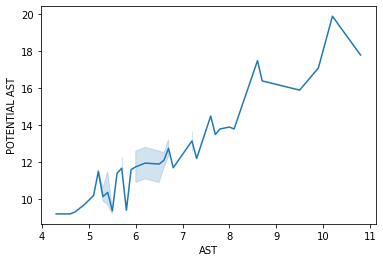

In [8]:
#Assists vs Potential AST
sns.lineplot(data=all_scores, x='AST', y='POTENTIAL AST')

<AxesSubplot:xlabel='AST', ylabel='pa_per_assist'>

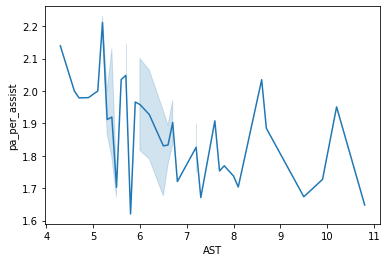

In [9]:
sns.lineplot(data=all_scores, x='AST', y='pa_per_assist')

<AxesSubplot:xlabel='AST', ylabel='AST TO PASS%'>

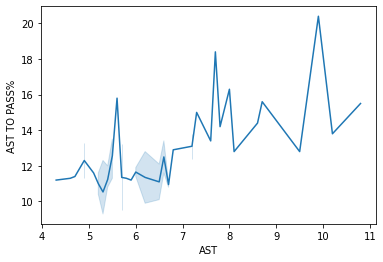

In [10]:
sns.lineplot(data=all_scores, x='AST', y='AST TO PASS%')

<AxesSubplot:xlabel='AST', ylabel='PASSES MADE'>

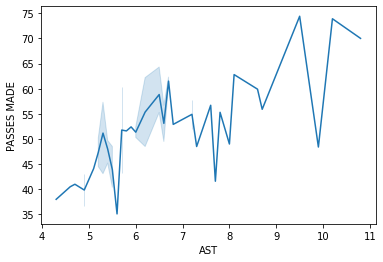

In [11]:
sns.lineplot(data=all_scores, x='AST', y='PASSES MADE')

Many of these graphs have positive correlation, but with a few interesting outliers. For example, Trae Young is averaging 9.9 assists per game on only 48.4 passes made, while the other players averaging the same assists are doing so on many more passes per game (Luka Doncic - 8.7 AST on 55.9 Passes, Nikola Jokic - 9.5 AST on 74.4 Passes

In [12]:
all_scores['Win Percent'] = all_scores['W']/(all_scores['W']+all_scores['L'])

<AxesSubplot:xlabel='POTENTIAL AST', ylabel='Win Percent'>

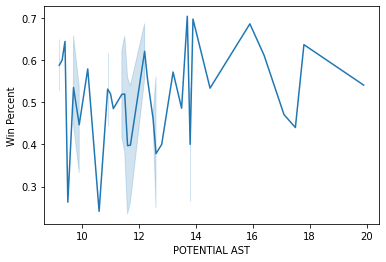

In [13]:
sns.lineplot(data=all_scores, x='POTENTIAL AST', y='Win Percent')

In [16]:
features = ['PASSES MADE','PASSES RECEIVED', 'SECONDARY AST', 'POTENTIAL AST',
       'AST PTS CREATED', 'AST ADJ', 'AST TO PASS%', 'AST TO PASS% ADJ','pa_per_assist']

In [17]:
correlationlist = []
for x in features:
    r = np.corrcoef(all_scores['AST'], all_scores[x])
    correlationlist.append((x,r[0,1]))
    
df = pd.DataFrame(correlationlist, columns =['Feature','Correlation'])

print(df)

            Feature  Correlation
0       PASSES MADE     0.655115
1   PASSES RECEIVED     0.635847
2     SECONDARY AST     0.471005
3     POTENTIAL AST     0.932124
4   AST PTS CREATED     0.983062
5           AST ADJ     0.982132
6      AST TO PASS%     0.629547
7  AST TO PASS% ADJ     0.568687
8     pa_per_assist    -0.447886


In [18]:
x = all_scores[['POTENTIAL AST','PASSES MADE']]

y = all_scores['AST']

In [19]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -0.6453442379427594
Coefficients: 
 [0.53497619 0.01216165]
